## Pergunta: Coloque um cabeçalho nesse notebook com o seu nome e resumindo o que descobriu ao explorar esses dados

## Formação Data Science Alura - Análise exploratória do MovieLens

Na formação de Data Scienda www.alura.com.br um dos conjuntos de dados que utilizamos é o de avaliações para filmes no site MovieLens. Neste projeto faremos uma análise exploratória desses dados.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Pergunta: conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

In [0]:
#!pip install pandas=="0.24.0" --quiet
#!pip install seaborn=="0.9.0" --quiet
#!pip install scipy=="1.2.0" --quiet

In [2]:
import pandas as pd
import seaborn as sns
import scipy

print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)

Usando pandas 1.0.4
Usando seaborn 0.10.1
Usando scipy 1.4.1


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Pergunta: carregue os filmes

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv` devem ser carregado em `filmes`
- renomeie as colunas para `filmeId`, `titulo` e `generos`
- configure o indice (`index`) para ser o `filmeId`

In [0]:
# solução
filmes=pd.read_csv('https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv')# carregando os dados movies.csv.
filmes.columns = ('filmeId','titulo','generos')#renomeando as colunas.
filmes.set_index('filmeId',inplace=True)#configurando o indice.

In [4]:
filmes.head()

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [5]:
print("Carregamos %d filmes" % len(filmes))
if(len(filmes) != 9742):
    print("ERRO! O conjunto de dados que estamos trabalhando nesse projeto possui 9742 elementos.")

Carregamos 9742 filmes


Vamos extrair o ano dos filmes (código já pronto): 

In [6]:
ano_de_lancamento = filmes.titulo.str.extract("\((\d{4})\)")
filmes['ano_de_lancamento'] = ano_de_lancamento.astype(float)
filmes.head()

,titulo,generos,ano_de_lancamento
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
5,Father of the Bride Part II (1995),Comedy,1995.0


## Pergunta: carregando as notas

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv` devem ser carregado em `notas`
- renomeie as colunas para `usuarioId`, `filmeId`, `nota` e `momento`

In [0]:
# solução
notas = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv')# carregando os dados
notas.columns = ('usuarioId','filmeId','nota','momento')

In [8]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Pergunta: gere uma nova feature, a média dos votos por filme

- crie uma nova coluna chamada `nota_media` dentro do dataframe `filmes`

Dicas:
- como filmeId já é o indice de seu dataframe filmes, se você possui uma série com o número de votos por filme, basta atribuir uma nova coluna normalmente que será usado o mesmo índice

In [9]:
# solução
#Criando uma Serie com as medias das notas de cada filme. Também arredondei os valores para 3 casa decimais,facilitando a leitura.
nota_media = notas.groupby('filmeId')['nota'].mean().round(3)
print(f'{nota_media}/n/n')#visualizando a serie.
filmes['nota_media'] = nota_media

filmeId
1         3.921
2         3.432
3         3.260
4         2.357
5         3.071
          ...  
193581    4.000
193583    3.500
193585    3.500
193587    3.500
193609    4.000
Name: nota, Length: 9724, dtype: float64/n/n


In [10]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.921
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.432
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.260
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,2.357
5,Father of the Bride Part II (1995),Comedy,1995.0,3.071


## Pergunta: remova os filmes com menos de 50 avaliações

- conte o número de notas por filme
- adicione uma coluna nova chamada `total_de_votos` a `filmes` que representa o número de avaliações que aquele filme teve no conjunto de dados
- remova os que tem 49 ou menos de `filmes`

## Solução

In [11]:
# solução para calcular o total de votos por filme
notas['filmeId'].value_counts()
#Índice é a Id do filme e os valores são as quantidades de notas atribuidas no filme.

356       329
318       317
296       307
593       279
2571      278
         ... 
5986        1
100304      1
34800       1
83976       1
8196        1
Name: filmeId, Length: 9724, dtype: int64

In [12]:
# solução para criar a nova coluna e filtrar os filmes
filmes['total_de_votos'] = notas['filmeId'].value_counts()#Criando a coluna 'total de votos'.
print(filmes.total_de_votos.isnull().value_counts())#Verificando se tem valores NaN na coluna.
filmes.total_de_votos.fillna(0,inplace=True)#Interpretar os valores NaN como filmes q tiverem 0 notas atribuidas.
filmes.query("total_de_votos < 50").index #Indentificando os filmes com menos de 50 votos e então indentifiquei seus índices.
filmes.drop(filmes.query("total_de_votos < 50").index,inplace=True)#Removendo esses filmes indentificados.

False    9724
True       18
Name: total_de_votos, dtype: int64


In [13]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media,total_de_votos
filmeId,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.921,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.432,110.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.260,52.0
6,Heat (1995),Action|Crime|Thriller,1995.0,3.946,102.0
7,Sabrina (1995),Comedy|Romance,1995.0,3.185,54.0


# Visualizando os dados gerais

## Pergunta: Visualize as notas médias

- histograma
- cummulative distribution function

Dicas:

- lembre-se de colocar um título nas imagens além de nomes nos eixos x e y
- para gerar a versão cumulativa lembre-se de usar os parâmetros `hist_kws` e `kde_kws` para definir `'cumulative'=True`

Text(0, 0.5, 'Nº de filmes')

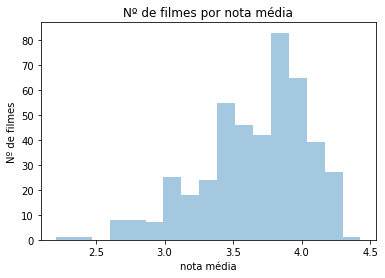

In [14]:
# solução histograma
ax=sns.distplot(filmes['nota_media'],kde=False,axlabel='nota média')#plotando histograma("kde=False" deixa os valores de y como nº de filmes).
ax.set_title('Nº de filmes por nota média')#Colocando título.
ax.set_ylabel('Nº de filmes')#Descrevendo o y.

Text(0, 0.5, 'Nº de filmes')

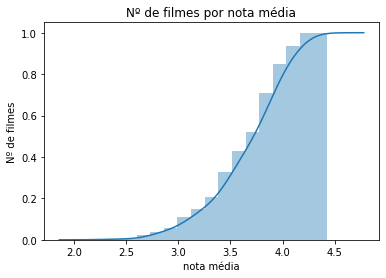

In [15]:
# solução cumulativa
ax=sns.distplot(filmes['nota_media'],axlabel='nota média',#descrevendo o eixo x
                hist_kws={'cumulative':True},kde_kws={'cumulative':True})#plotando histograma com os argumentos para se tornar acumulativo.
ax.set_title('Nº de filmes por nota média')#Colocando título.
ax.set_ylabel('Nº de filmes')#Descrevendo o y.

## Pergunta: Visualize o total de votos

- histograma
- cummulative distribution function

Text(0, 0.5, 'Nº de filmes')

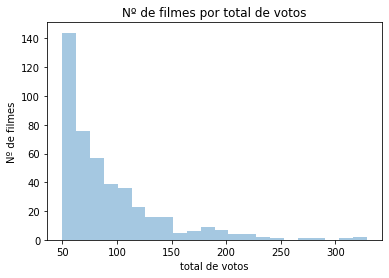

In [16]:
# solução histograma
ax=sns.distplot(filmes['total_de_votos'],kde=False,axlabel='total de votos')#plotando histograma("kde=False" deixa os valores de y como nº de votos).
ax.set_title('Nº de filmes por total de votos')#Colocando título.
ax.set_ylabel('Nº de filmes')#Descrevendo o y.

Text(0, 0.5, 'Nº de filmes')

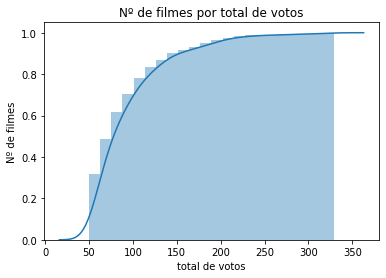

In [17]:
# solução cumulativa
ax=sns.distplot(filmes['total_de_votos'],axlabel='total de votos',#descrevendo o eixo x
                hist_kws={'cumulative':True},
                kde_kws={'cumulative':True})#plotando histograma com os argumentos para se tornar acumulativo.
ax.set_title('Nº de filmes por total de votos')#Colocando título.
ax.set_ylabel('Nº de filmes')#Descrevendo o y.

## Pergunta: 20% dos filmes do dataframe tem nota maior que? 

- lembre-se da função `quantile` do pandas

In [0]:
# solução
nota_limite_dos_20_porcento=filmes['nota_media'].quantile(0.8)

In [19]:
print("20 porcento dos filmes tem nota maior que de %.2f" % nota_limite_dos_20_porcento)

20 porcento dos filmes tem nota maior que de 3.99


## Vamos separar a coluna `generos` em diversas colunas.

- O código já está pronto.

In [20]:
filmes['generos'] = filmes['generos'].str.replace('-', '')
generos = filmes['generos'].str.get_dummies()
print("Temos %d generos distintos" % generos.shape[1])

Temos 19 generos distintos


In [21]:
filmes = filmes.join(generos).drop(columns=['generos'], axis=1)
filmes.head()

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995.0,3.921,215.0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1995.0,3.432,110.0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),1995.0,3.260,52.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6,Heat (1995),1995.0,3.946,102.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
7,Sabrina (1995),1995.0,3.185,54.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## Pergunta: visualização de quantos filmes existem por genero

- Para cada um dos generos você deve agrupar o número de filmes
- Ordene as barras, na esquerda o genero com mais filmes, na direita o que tem menos filmes

Dica:

- Para fazer a soma de uma ou mais colunas individualmente você pode usar `seu_dataframe.sum()`
- Não precisa usar o dataframe `filmes`, somente o dataframe `generos`
- Em certas situações é mais fácil usar as funções de plotagem do pandas ao invés do seaborn

Text(0.5, 1.0, 'Filmes por gênero')

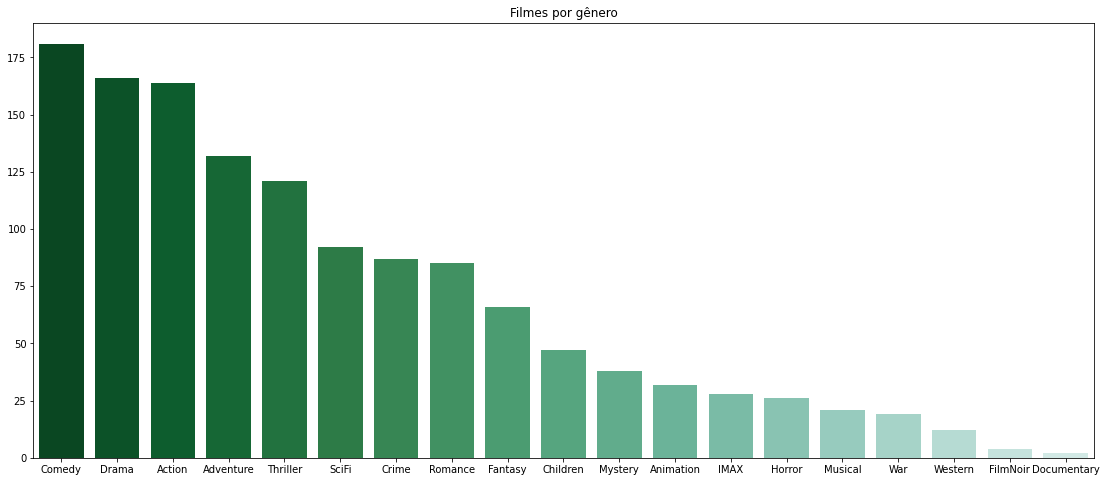

In [22]:
# solução
import matplotlib.pyplot as plt#importando matplotlib para alterar o tamanho da figura
filmes_por_genero=generos.sum().sort_values(ascending=False)#criando serie com a contagem de generos além de ordenar de forma decrescente.
plt.figure(figsize=(19,8))#alterando tamanho da figura
ax = sns.barplot(x=filmes_por_genero.index,y=filmes_por_genero.values,#indicando os eixos do gráfico
                 palette=sns.color_palette('BuGn_r',n_colors=len(filmes_por_genero)+5))#plotando barrra alem de adicionar uma palette que tenha sentido com o gráfico
ax.set_title('Filmes por gênero')#Colocando título.

## Pergunta: Quais são os 5 generos com mais filmes?

Dica:

- `sort_values()` pode ordenar uma Series do pandas

In [0]:
# solução
top5_generos_em_quantidade_de_filmes=filmes_por_genero[:5]#selecionando os top5

In [24]:
print(top5_generos_em_quantidade_de_filmes)

Comedy       181
Drama        166
Action       164
Adventure    132
Thriller     121
dtype: int64


## Pergunta: visualização de votos por genero

- o código que gera os votos por genero já está pronto
- ordene as categorias da mais visualizada para a menos visualizada
- gere a visualização por genero

In [25]:
votos_por_genero_por_filme = pd.DataFrame((generos.values.T * filmes['total_de_votos'].values).T, columns = generos.columns)
votos_por_genero_por_filme.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,0.0,215.0,215.0,215.0,215.0,0.0,0.0,0.0,215.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,110.0,0.0,110.0,0.0,0.0,0.0,0.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0
3,102.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0
4,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0


In [26]:
# solucão
votos_por_genero=votos_por_genero_por_filme.sum().sort_values(ascending=False)
votos_por_genero

Action         15734.0
Drama          15445.0
Comedy         15330.0
Adventure      13117.0
Thriller       11907.0
SciFi           8989.0
Crime           8649.0
Romance         7444.0
Fantasy         5993.0
Children        4331.0
Mystery         3452.0
Animation       3066.0
IMAX            2492.0
Horror          2215.0
War             2113.0
Musical         1822.0
Western          900.0
FilmNoir         291.0
Documentary      108.0
dtype: float64

Text(0.5, 1.0, 'Votos por gênero')

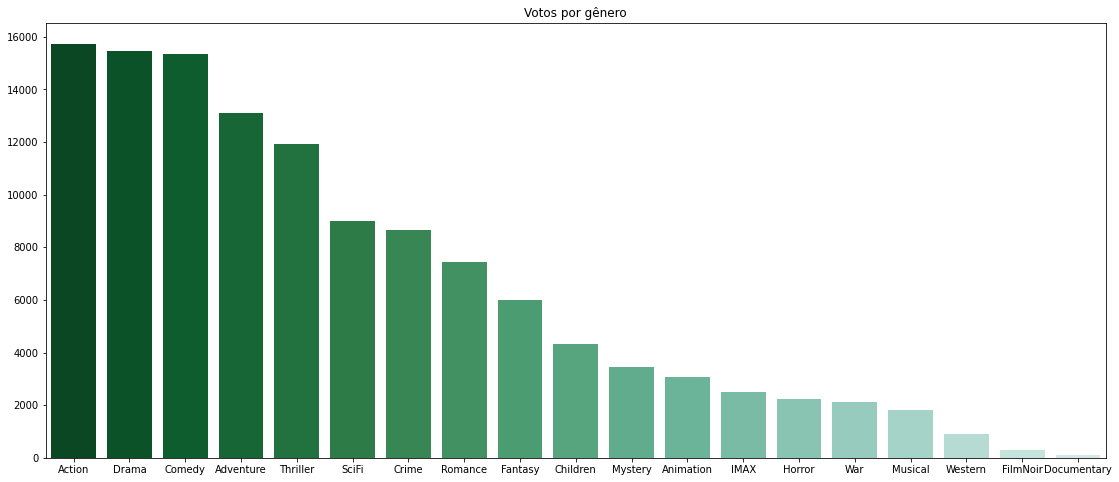

In [27]:
# solução
plt.figure(figsize=(19,8))#alterando tamanho da figura
ax = sns.barplot(x=votos_por_genero.index,y=votos_por_genero.values,#indicando os eixos do gráfico
                 palette=sns.color_palette('BuGn_r',n_colors=len(votos_por_genero)+5))#plotando barrra alem de adicionar uma palette que tenha sentido com o gráfico
ax.set_title('Votos por gênero')#Colocando título.

## Pergunta : votos por filme por genero

Queremos entender a quantidade de votos em relação a quantidade de filmes existentes naquele genero.

Por exemplo: 
- se temos 1000 votos de `Ação` e 10 filmes desse genero, foram 100 votos por filme nesse genero.
- se o gênero `Documentário` tem 2 filmes e 500 votos, ele tem 250 votos por filme nesse gênero.

Queremos entender isso, a "popularidade" média de um filme em cada categoria, isto é, o número de votos dividido pelo número de filmes, organizado para cada categoria.

- Você já possui o número de votos por genero
- Calcule o número de votos por genero dividido pelo total de filmes por genero
- Ordene do maior para o menor
- Plote um gráfico para visualizarmos esses dados

In [28]:
# solucao código
votos_por_filme_por_genero = pd.Series()#Criando lista vazia
for genero in votos_por_genero.index:#selecionando os indices(generos) para realizar o calculo.
  votos_por_filme_por_genero[genero]=(votos_por_genero[genero]/filmes_por_genero[genero]).round(3)# Arrendondando pra 3 casa decimais pra facilitar a leitura
votos_por_filme_por_genero.sort_values(ascending=False,inplace=True)#Colocando os valores em ordem decrescente para facilitar a leitura dos dados.
votos_por_filme_por_genero

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


War            111.211
Crime           99.414
Adventure       99.371
Thriller        98.405
SciFi           97.707
Action          95.939
Animation       95.812
Drama           93.042
Children        92.149
Mystery         90.842
Fantasy         90.803
IMAX            89.000
Romance         87.576
Musical         86.762
Horror          85.192
Comedy          84.696
Western         75.000
FilmNoir        72.750
Documentary     54.000
dtype: float64

Text(0.5, 1.0, 'Votos por filme por gênero')

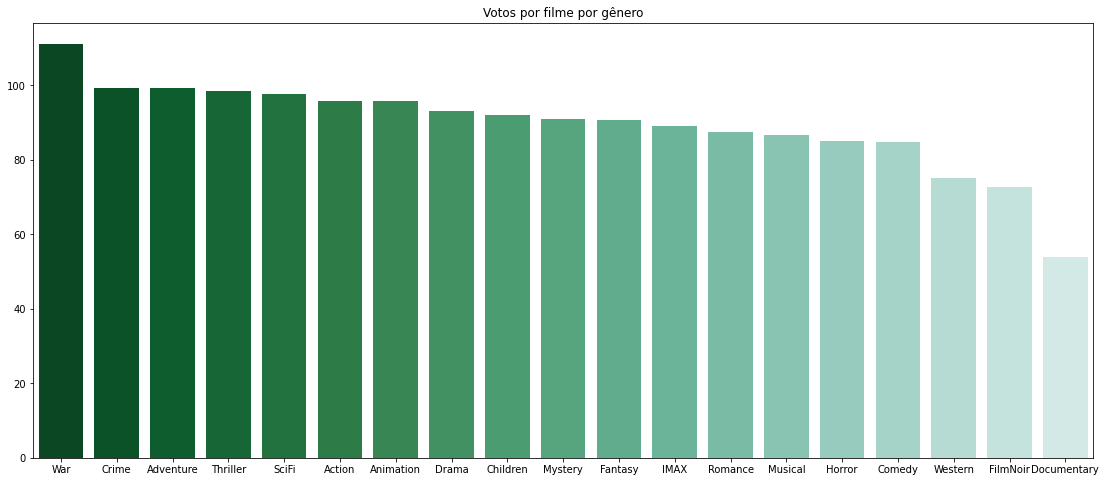

In [29]:
# solução visualização
plt.figure(figsize=(19,8))#alterando tamanho da figura
ax = sns.barplot(x=votos_por_filme_por_genero.index,y=votos_por_filme_por_genero.values,#indicando os eixos do gráfico
                 palette=sns.color_palette('BuGn_r',n_colors=len(votos_por_filme_por_genero)+5))#plotando barrra alem de adicionar uma palette que tenha sentido com o gráfico
ax.set_title('Votos por filme por gênero')#Colocando título.

## Pergunta: Olhando as 3 últimas visualizações o que você conclui sobre os generos `Action` e `War`?

### Solução (texto livre):
Mesmo que os filmes de ação estejam no top 3, tanto na quantidade de votos por filme quanto na quantidade de filmes por generos, o mesmo fica de fora do top 3 de votos por filme por gênero.

Ao contrario dos filmes de guerra que mesmo com poucos votos e filmes produzidos está em primeiro em votos por filme por gênero.

O que leva algumas hipóteses ***sobre os dados obtidos***:
  - Muitos filmes de ação são pouco relevantes e recebem poucos votos.
  - Poucos são os filmes de ação que são relevantes a ponto de receber voto.
  - Filmes de guerra são muito discutidos para aqueles que assistem,logo filmes desse gênero geralmente tem alta relevância e receberá varios votos.

    

## Pergunta: Crie 2 boxplots no mesmo plot comparando a coluna `total_de_votos` dos filmes de categoria `Horror` e `Adventure`  

Dica:

- as vezes é mais fácil usar o boxplot do matplotlib ao invés do seaborn
- plt.boxplot suporta o parâmetro labels com uma lista de nomes para cada boxplot plotado

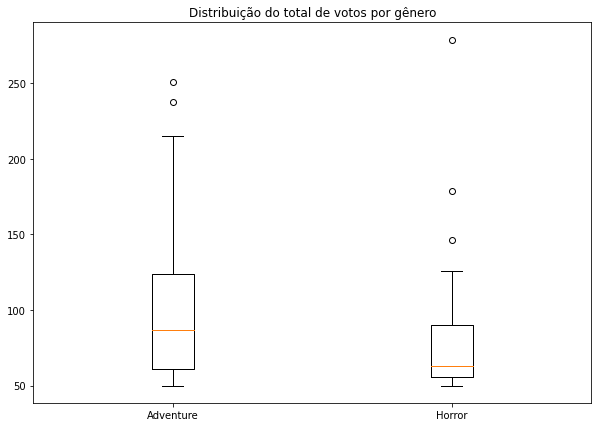

In [30]:
# solução:
plt.figure(figsize=(10,7))#Ajustando o tamanho da figura
ax=plt.boxplot([filmes.query('Adventure == 1').total_de_votos,filmes.query('Horror == 1').total_de_votos],labels=['Adventure','Horror'])#Plotando a imagem com descrição dos labels
plt.title('Distribuição do total de votos por gênero')#Colocando titulo
plt.show()#Retirando as linhas de carregamento do boxplot

## Pergunta: mostre agora um boxplot para cada uma das categorias

Dica:
- use generos.columns para acessar todos os gêneros
- já removemos os hífens dos nomes das colunas quando criamos as colunas de gêneros
- plt (pyplot) do matplotlib suporta a função xticks(rotation=90) para rotacionar os labels

<function matplotlib.pyplot.show>

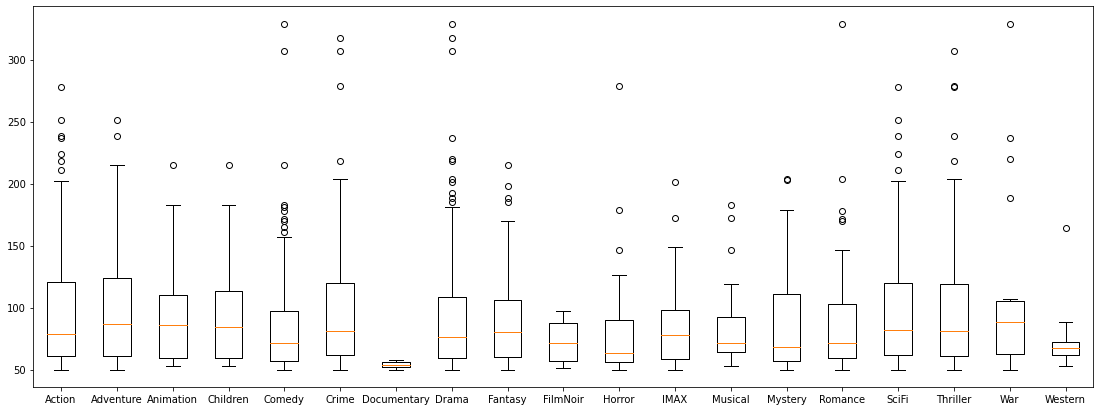

In [31]:
x=[]#Criando lista.
for genero in generos.columns:#Selecionando cada genero
  x.append(filmes.query(f'{genero} == 1').total_de_votos)#Colocando o total_de_votos por filme de cada gênero 
plt.figure(figsize=(19,7))#Ajustando o tamanho da figura
plt.boxplot(x,labels=generos.columns)#Plotando a imagem com descrição dos labels(gêneros)
plt.show#Retirando as linhas de carregamento do boxplot

## Pergunta: desejo criar um filme com somente um dos gêneros: `Horror` ou `Adventure`. Quero ter uma chance maior de ter um faturamento que pague minhas contas, mesmo que não seja um super sucesso absurdo de vendas. Qual dos 2 gêneros você sugere?

### Solução:
    Ao observar o gráfico acima nota-se que: A mediana dos filmes de aventura possui uma quantidade de votos superior a mediana dos filmes de horror. Logo 50% dos filmes de aventura tiveram maior revelancia que 50% dos filmes de horror.

    Portanto, relacionando relevancia e faturamento como fatores diretamente proporcionais, conclui-se que: Criar um filme de aventura tem mais chance de pagar as contas do que um filme de horror.


## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição dos votos dos filmes de `Adventure` e `Horror`. Sua recomendação continua a mesma? Explique.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

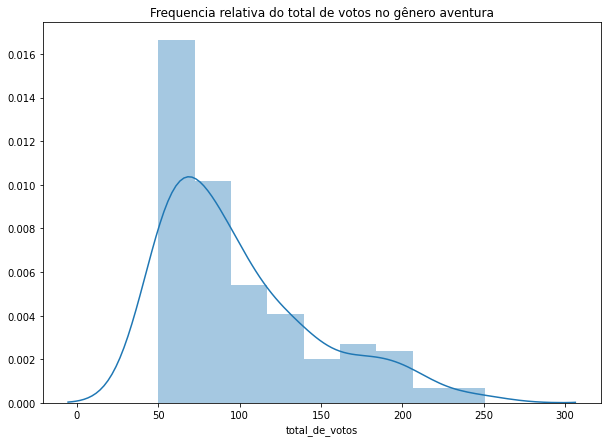

In [32]:
# solucao histograma de aventura
plt.figure(figsize=(10,7))
sns.distplot(filmes.query('Adventure == 1').total_de_votos)
plt.title('Frequencia relativa do total de votos no gênero aventura')
plt.show()

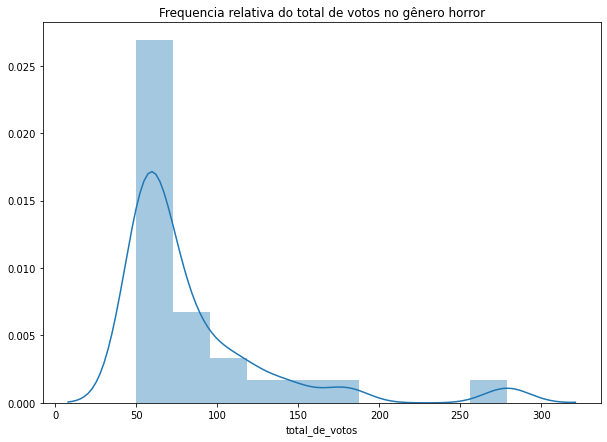

In [33]:
# solucao histograma de horror
plt.figure(figsize=(10,7))
sns.distplot(filmes.query('Horror == 1').total_de_votos)
plt.title('Frequencia relativa do total de votos no gênero horror')
plt.show()

In [34]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo
from scipy.stats import normaltest
_,p=normaltest(filmes.query('Horror == 1').total_de_votos)
p
_,P=normaltest(filmes.query('Adventure == 1').total_de_votos)
P
print(f'Tese de normalidade para gênero de horror: {p} \nTese de normalidade para gênero de aventura:{P}')

Tese de normalidade para gênero de horror: 1.2786148884334685e-07 
Tese de normalidade para gênero de aventura:5.987863006199139e-06


In [35]:
# solução com o teste desejado
from scipy.stats import ranksums
_,p=ranksums(filmes.query('Horror == 1').total_de_votos,filmes.query('Adventure == 1').total_de_votos)
p

0.04782366231999856

### Solução (explique sua conclusão):
  Tanto o teste de normalidade para cada um dos gêneros, quanto o teste de comparação das distribuições tiveram resultados menores que 5%, logo podemos rejeitar que as hipóteses são nulas e continuar afirmando as conclusões observadas anteriormente.


## Pergunta: Faça os mesmos boxplots para as notas médias (`nota_media`) dos gêneros `Adventure` e `Horror`.

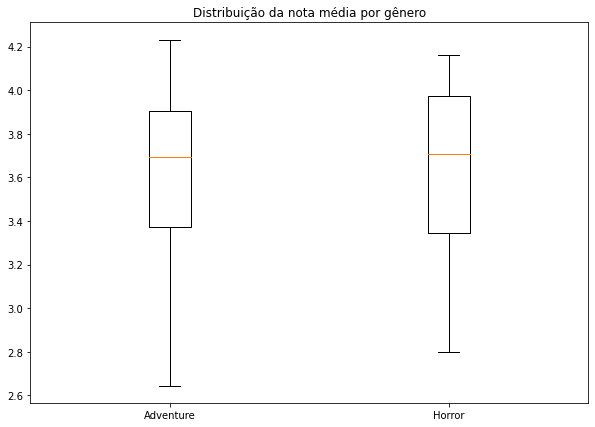

In [36]:
# solução:
plt.figure(figsize=(10,7))#Ajustando o tamanho da figura
ax=plt.boxplot([filmes.query('Adventure == 1').nota_media,filmes.query('Horror == 1').nota_media],labels=['Adventure','Horror'])#Plotando a imagem com descrição dos labels
plt.title('Distribuição da nota média por gênero')#Colocando titulo
plt.show()#Retirando as linhas de carregamento do boxplot

## Pergunta: Quero fazer um filme que seja sucesso de crítica, com pessoas dando notas altas, mesmo que não tenha um número muito grande de pessoas assistindo. Qual gênero você recomenda se tenho que escolher somente um entre `Adventure` e `Horror`?

### Solução:
Pelo gráfico observamos que a mediana dos gêneros são quase iguais, no entanto o limite superior dos filmes de aventura supera o limite superior dos filmes de horror, ou seja, existe **pelo menos um filme** de aventura que supera o filme de horror com melhor sucesso de crítica.

Potanto, mesmo que não tenha um número grande de pessoas assistindo, é recomendável que realize um ***filme de aventura***.



## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição das notas dos filmes de `Adventure` e `Horror`.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

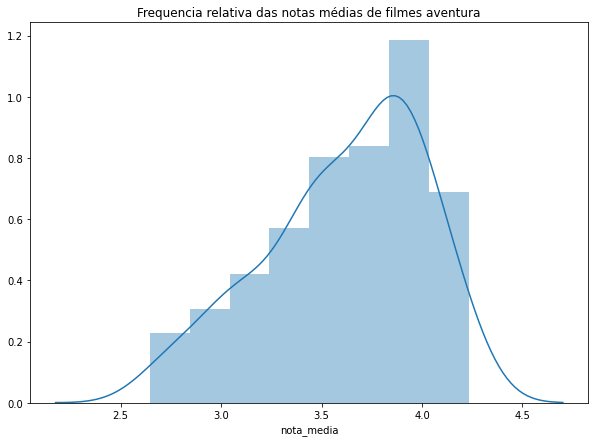

In [37]:
# solucao histograma de aventura
plt.figure(figsize=(10,7))
sns.distplot(filmes.query('Adventure == 1').nota_media)
plt.title('Frequencia relativa das notas médias de filmes aventura')
plt.show()

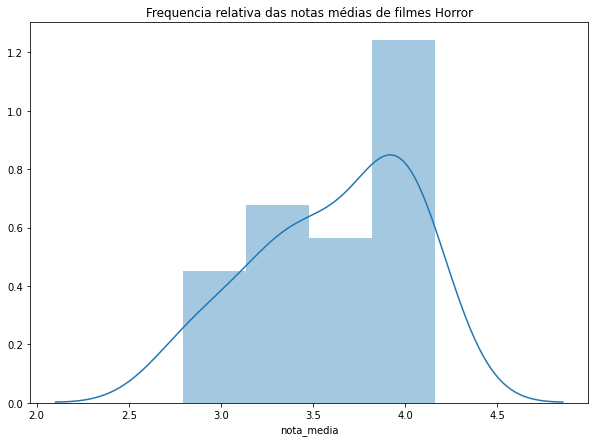

In [38]:
# solucao histograma de horror
plt.figure(figsize=(10,7))
sns.distplot(filmes.query('Horror == 1').nota_media)
plt.title('Frequencia relativa das notas médias de filmes Horror')
plt.show()

In [39]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo
from scipy.stats import normaltest
_,p=normaltest(filmes.query('Horror == 1').total_de_votos)
p
_,P=normaltest(filmes.query('Adventure == 1').total_de_votos)
P
print(f'Tese de normalidade para gênero de horror: {p} \nTese de normalidade para gênero de aventura:{P}')

Tese de normalidade para gênero de horror: 1.2786148884334685e-07 
Tese de normalidade para gênero de aventura:5.987863006199139e-06


In [40]:
# solução com o teste desejado
from scipy.stats import ranksums
_,p=ranksums(filmes.query('Horror == 1').total_de_votos,filmes.query('Adventure == 1').total_de_votos)
p

0.04782366231999856

## Sua recomendação para maior sucesso de crítica em nota alta entre `Horror` e `Adventure` continua a mesma? Explique.



### Solução:
Tanto o teste de normalidade para cada um dos gêneros, quanto o teste de comparação das distribuições tiveram resultados menores que 5%, logo podemos rejeitar que as hipóteses são nulas e continuar afirmando as conclusões observadas anteriormente.

## Pergunta: Quero fazer um filme que seja primeiro sucesso de crítica, com pessoas dando notas altas. Em segundo lugar quero que seja popular (mais pessoas assistam). Com as informações visuais e estatísticas, supondo poder escolher somente um, qual dois 2 gêneros você recomenda agora? `Horror` ou `Adventure`?

### Solução:
Pelo gráfico observamos que a mediana dos gêneros são quase iguais, no entanto o terceiro quartil dos filmes de horror tem uma nota média maior que dos filmes de aventura.

Portanto, os "melhores" filmes de horror(considerando melhor como notas acima do terceiro quartil) tiveram notas maiores que os "melhores" de aventura.Além disso concluimos acima que os filmes de aventura possuem maior relevância.

Por fim, conclui-se que, se deseja um filme sucesso de crítica e ainda ser popular, deve-se fzer um filme de aventura.

## Pergunta: Quais são os top 5 filmes dos 2 generos mais assistidas?

- utilize os 2 generos mais votados em `votos_por_genero`
- utilize a `nota_media` para definir o top 5 filmes
- o resultado são 5, não 10 filmes

In [41]:
votos_por_genero

Action         15734.0
Drama          15445.0
Comedy         15330.0
Adventure      13117.0
Thriller       11907.0
SciFi           8989.0
Crime           8649.0
Romance         7444.0
Fantasy         5993.0
Children        4331.0
Mystery         3452.0
Animation       3066.0
IMAX            2492.0
Horror          2215.0
War             2113.0
Musical         1822.0
Western          900.0
FilmNoir         291.0
Documentary      108.0
dtype: float64

In [42]:
# solução: calculando os 2 generos mais votados
votos_por_genero.iloc[:2]

Action    15734.0
Drama     15445.0
dtype: float64

In [43]:
# solução: encontrando os top 5 filmes desses generos
filmes.query('Action == 1 & Drama==1').nota_media #Descobrindo os filmes de ação e drama
print(f'{filmes.query("Action==1 & Drama==1").nota_media.iloc[:5]}\n')#Descobrindo o top5
filmes['titulo'].loc[[110,145,168,292,293]]#Descobrindo o título dos filmes.

filmeId
110    4.032
145    3.245
168    3.083
292    3.426
293    4.019
Name: nota_media, dtype: float64



filmeId
110                                    Braveheart (1995)
145                                      Bad Boys (1995)
168                                  First Knight (1995)
292                                      Outbreak (1995)
293    Léon: The Professional (a.k.a. The Professiona...
Name: titulo, dtype: object

## Pergunta: Quais são os 2 generos com maior valor de correlação com a `nota_media`? E os 2 com menor valor de correlação com a `nota_media`?

- O pandas possui a função `corr` para calcular correlação entre todas as colunas

In [44]:
# solucao
print(filmes.corr().loc['nota_media'].sort_values())
print(f'\nObservando a informação acima percebe-se que são: Drama e Comédia(nesta ordem).')

Comedy              -0.255977
ano_de_lancamento   -0.159144
Action              -0.154109
SciFi               -0.136717
Adventure           -0.080021
Romance             -0.072016
Western             -0.059651
Horror              -0.033917
Children            -0.030392
Fantasy             -0.020928
Thriller            -0.016787
Musical             -0.008502
Documentary         -0.003473
Animation            0.043065
IMAX                 0.064912
FilmNoir             0.081768
War                  0.125626
Mystery              0.129906
Crime                0.190251
Drama                0.277641
total_de_votos       0.342581
nota_media           1.000000
Name: nota_media, dtype: float64

Observando a informação acima percebe-se que são: Drama e Comédia(nesta ordem).


## Pergunta: Quais são os 2 generos com maior valor de correlação com `total_de_votos`? E quais os 2 com menor valor de correlação com `total_de_votos`?

In [45]:
# solucao
print(filmes.corr().loc['total_de_votos'].sort_values())
print(f'\nObservando a informação acima percebe-se que,de forma negativa ou não, os gêneros de maior correlação são: Comédia e Aventura (nesta ordem).')

Comedy              -0.128527
Western             -0.060789
Documentary         -0.055010
Romance             -0.045427
FilmNoir            -0.039408
Horror              -0.036132
ano_de_lancamento   -0.028709
Musical             -0.024741
IMAX                -0.016285
Fantasy             -0.009976
Mystery             -0.007051
Children             0.001764
Drama                0.018779
Animation            0.023442
SciFi                0.063802
Action               0.066239
Crime                0.079766
Thriller             0.085525
War                  0.087999
Adventure            0.104380
nota_media           0.342581
total_de_votos       1.000000
Name: total_de_votos, dtype: float64

Observando a informação acima percebe-se que,de forma negativa ou não, os gêneros de maior correlação são: Comédia e Aventura (nesta ordem).


## Pergunta: Visualize graficamente o relacionamento entre ano de lançamento e nota média

- Use o gráfico `lineplot`

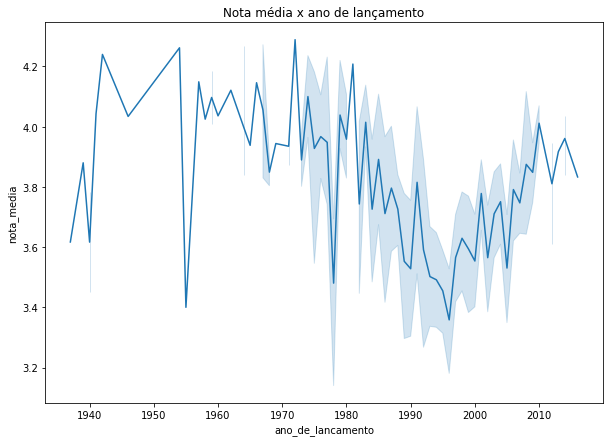

In [46]:
# solucao
plt.figure(figsize=(10,7)) #Configurando imagem da figura
sns.lineplot(data=filmes,x='ano_de_lancamento',y='nota_media')#Plotando o gráfico
plt.title('Nota média x ano de lançamento')#Título
plt.show()

## Pergunta: Interprete a correlação entre `ano_de_lancamento` e a `nota_media`?

- Calcule a correlação numericamente (use o `corr` do pandas)
- Correlação não implica causalidade, qual "problema" na coleta dos dados pode gerar esse tipo de correlação?

In [47]:
# solução (código)
filmes[['ano_de_lancamento','nota_media']].corr()

,ano_de_lancamento,nota_media
ano_de_lancamento,1.000000,-0.159144
nota_media,-0.159144,1.000000


### Solução (explicação)
  Se observassemos apenas os dados obtidos pela função "corr" concluiríamos que quanto mais recente o filme, menor sua nota média. No entando observando o gráfico de lineplot percebemos que a correlação é tão baixa que nem é possível determinar isso. 


## Pergunta: analise um pairplot

- crie uma variável chamada `infos` baseada nas colunas `ano_de_lancamento`, `nota_media` e `total_de_votos` de `filmes`
- faça o pairplot usando seaborn
- coloque uma regressão linear para cada pequeno plot dentro dele

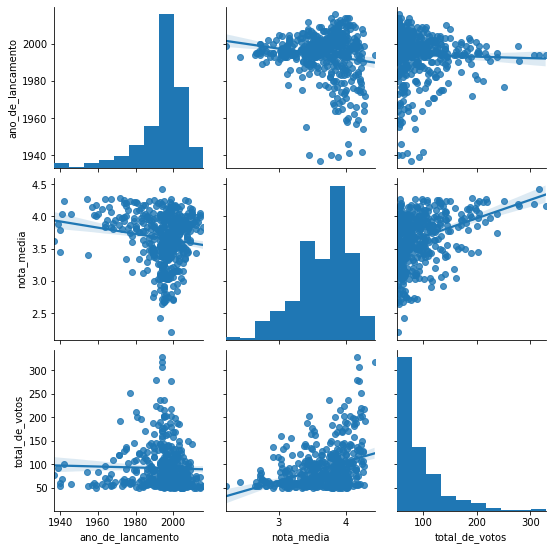

In [48]:
# solução
infos=filmes[['ano_de_lancamento','nota_media','total_de_votos']]#criando infos.
sns.pairplot(infos,kind='reg')#A função "kind='reg'" possibilita realizar uma regressão linear.
plt.show()#Mostrar apenas a figura

## Pergunta: analise um pairplot dos filmes de `Animation`

- use o dataframe `filmes`
- em um único pairplot separe com cores distintas os filmes da categoria `Animation` dos outros
- use uma palete como `husl`
- use marcadores distintos para cada um dos dois grupos
- faça o pairplot usando seaborn e coloque uma regressão linear para cada pequeno plot dentro dele
- tanto em x quanto y use somente três variáveis: `total_de_votos`, `ano_de_lancamento`, `nota_media`

<Figure size 1440x720 with 0 Axes>

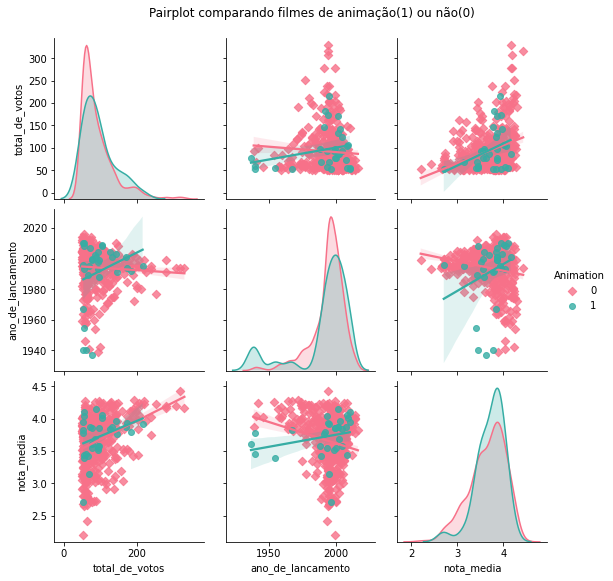

In [49]:
plt.figure(figsize=(20,10))
ax=sns.pairplot(filmes,x_vars=['total_de_votos','ano_de_lancamento','nota_media'],y_vars=['total_de_votos','ano_de_lancamento','nota_media'],#colocando as colunas que serão usadas no pairplot.
             hue='Animation',palette='husl',markers=['D','o'],kind='reg')#Diferenciando os filmes entre os que são de animação ou não em cor e marcador.
ax.fig.suptitle('Pairplot comparando filmes de animação(1) ou não(0)', y=1.05)#Plotando um titulo na figura.
plt.show()

## Pergunta: Analise a regressão em relação ao ano de lançamento.

- Como parece se comportar a `nota_media` de filmes de `Animation` mais antigos e mais recentes? (ano_de_lancamento x nota_media). Essa correlação parece ser baixa, mas parece ser linear?
- E o `ano_de_lancamento` x `total_de_votos`?
- E das outras categorias? Compare isso com os outros filmes.
- O que leva você levantar como hipótese para esse resultado?

### Solução:
- Enquanto que os filmes animados tendem a aumentar a nota média com o passar do tempo, os filmes não animados tendem a registrar uma queda de nota média. Olhando para os pontos do grafico nota_media x ano_de_lançamento nota-se que essa tendência decai rapidamente de forma exponencial para os filmes não animados.
- Diferente das notas medias, gráfico ano_de_lançamento x total_de_votos mostra que a quantidade de votos aumentaram até aproximadamente os anos 2000, e depois disso, decaiu. Oque nos leva a concluir q a maioria dos votos realizados nesse site foram para filmes próximo do ínicio do seculo 21.
- Observando o gráfico ano_de_lançamento x ano_de_lançamento observamos um aumento na quantidade de filmes coletados na amostra até o início do século 21.
- Com essas duas observações podemos levar algumas hipóteses como:
 - As notas médias que mais devem se aproximar com o cenário real, são de filmes próximos do início da década.   
 - Com a evolução das tecnologias de animação, os filmes começaram a ganhar mais relavância para a população real e melhores notas.
 - A queda de nota média de filmes não animados ocorre pois, com o aumento do número de votos, a nota média passou a ser um dado mais próximo do real apartir do século 21
 - O decaimento de votos depois dos anos próximos a 2000 ocorre pois a quantidade de pessoas que votaram em filmes novos é menor que as que votaram em filmes do início do século. 

## Pergunta: Explore

- compartilhe conosco 2 visualizações extras que julgar interessante
- explique o que encontrou
- use quantas células (texto ou código) julgar necessário

 ### 1º visualização: 
 Decidi explorar um pouco mais os filmes de western, e buscar em que época ele estava "bombando" em produções. Para isso pesquisarei a frequencia em que os filmes foram lançados. E então associarei com momentos históricos os prováveis motivos dessa ascensão e queda da produção.

Text(0, 0.5, 'Frequencia relativa')

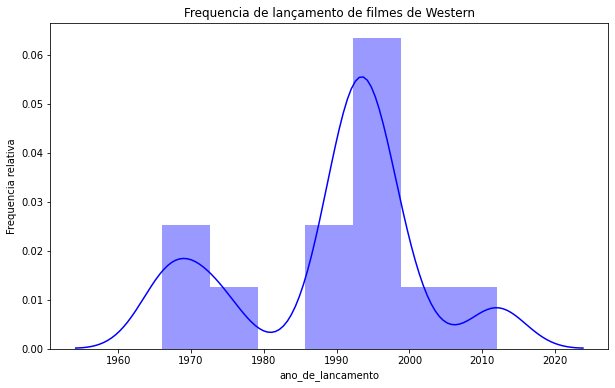

In [50]:
plt.figure(figsize=(10,6))
sns.distplot(filmes.query('Western == 1')['ano_de_lancamento'],color='blue')
plt.title('Frequencia de lançamento de filmes de Western')
plt.ylabel('Frequencia relativa')

Conclusão:

Os filmes de western tiveram sua primeira ascensão dos anos 60 até o fim dos anos 70,isso se explica pois a grande onda nacionalista do país(Em que os americanos são heróis que desbravaram o oeste) começou a decair devido ao fim da guerra do Vietnã, em que o surgimento de movimentos contrários a essa visão(como o movimento hippie) cresceram, gerando assim a sua grande queda.

Apartir dos anos 90 os filmes em geral nesse dado aumenta devido ao grande crescimento do cinema hollywoodiano.

### 2º Visualização: Quais gêneros estão mais relacionados entre si?
Quantos filmes de ação são também filmes de aventura? E para os filmes de drama?
A maioria dos filmes de Animação são também para crianças? Dúvidas como essa me vieram quando observei que se somar os valores da séria filmes_por_gênero, dá um valor maior q a quantidades de filmes.

Portanto farei uma correlação entre esses gêneros para entender como gêneros estão distribuidos entre eles.

In [51]:
filmes_por_genero# Observando os gêneros estudados.

Comedy         181
Drama          166
Action         164
Adventure      132
Thriller       121
SciFi           92
Crime           87
Romance         85
Fantasy         66
Children        47
Mystery         38
Animation       32
IMAX            28
Horror          26
Musical         21
War             19
Western         12
FilmNoir         4
Documentary      2
dtype: int64

Como os gêneros Noir e documentario têm menos de 10 filmes, não tem como eu ter conclusões precisas para eles. Portanto os descartarei na minha análise.
Além disso IMAX não é um gênero e sim um formato de resolução do filme, logo o descarterei também.



In [0]:
generos_n = ['Comedy','Drama','Action','Adventure','Thriller','SciFi','Crime','Romance','Fantasy','Children','Mystery','Animation','Horror','Musical','War','Western']
#Criando uma lista com os gêneros que estudarei

In [53]:
porcentagem_por_genero = pd.DataFrame(index=generos_n)#Criando um dataframe com os index na ordem dos gêneros_n.
for coluna in generos_n:#Um primeiro for para adicionar a coluna no dataframe porcentagem_por_genero.
  x=[]#Criando uma lista vazia para adicionar a correlação entre gêneros
  for genero in generos_n:#For para adicionar os dados no x.
    # Como exemplo o cálculo é:
    # filmes de gênero 1(conta-se quantos filmeId tem no dataframe) = y.
    # filmes de gênero 1 e 2 = z.
    # relação entre os gêneros(em %) = (z/y) * 100.
    x.append(round(filmes.query(f'{coluna} == 1 & {genero} == 1').shape[0]/filmes.query(f'{coluna} == 1').shape[0],3)*100)
  porcentagem_por_genero[f'{coluna}'] = x # Adicionando a coluna.
porcentagem_por_genero #Mostrando tabela.

,Comedy,Drama,Action,Adventure,Thriller,SciFi,Crime,Romance,Fantasy,Children,Mystery,Animation,Horror,Musical,War,Western
Comedy,100.0,21.7,21.3,33.3,10.7,19.6,27.6,63.5,51.5,57.4,7.9,62.5,34.6,52.4,21.1,41.7
Drama,19.9,100.0,20.7,15.2,33.9,21.7,46.0,43.5,22.7,19.1,39.5,15.6,15.4,19.0,84.2,33.3
Action,19.3,20.5,100.0,61.4,61.2,67.4,42.5,16.5,22.7,6.4,26.3,6.2,34.6,4.8,52.6,50.0
Adventure,24.3,12.0,49.4,100.0,28.9,54.3,6.9,12.9,56.1,53.2,15.8,56.2,11.5,19.0,10.5,41.7
Thriller,7.2,24.7,45.1,26.5,100.0,39.1,49.4,8.2,7.6,0.0,73.7,0.0,38.5,0.0,15.8,0.0
SciFi,9.9,12.0,37.8,37.9,29.8,100.0,5.7,4.7,6.1,8.5,18.4,6.2,23.1,4.8,0.0,16.7
Crime,13.3,24.1,22.6,4.5,35.5,5.4,100.0,2.4,4.5,4.3,34.2,6.2,11.5,0.0,5.3,0.0
Romance,29.8,22.3,8.5,8.3,5.8,4.3,2.3,100.0,21.2,17.0,10.5,21.9,3.8,33.3,15.8,16.7
Fantasy,18.8,9.0,9.1,28.0,4.1,4.3,3.4,16.5,100.0,53.2,10.5,43.8,11.5,38.1,5.3,0.0
Children,14.9,5.4,1.8,18.9,0.0,4.3,2.3,9.4,37.9,100.0,2.6,93.8,0.0,66.7,0.0,0.0


Percebe-se que é difícil indentificar por exemplo, quais gêneros estão mais relacionados ao gênero ação. Portanto realizei um heatmap(do seaborn) para ficar mais claro essa indentificação "colorindo" o mesmo

Biblioteca do heatmap: https://seaborn.pydata.org/generated/seaborn.heatmap.html

ATENÇÂO: O gráfico deve ser lido pelas colunas, exemplo:
Na coluna Action observa-se que 49% dos filmes de ação são também de aventura.

Além disso se somar as porcentagens de cada coluna terá soma maior que 100, já que há filmes com mais de 2 gêneros relacionados.

Apesar da pequena dificuldade de entender o heatmap, as correlações estão bem mais indentificáveis.

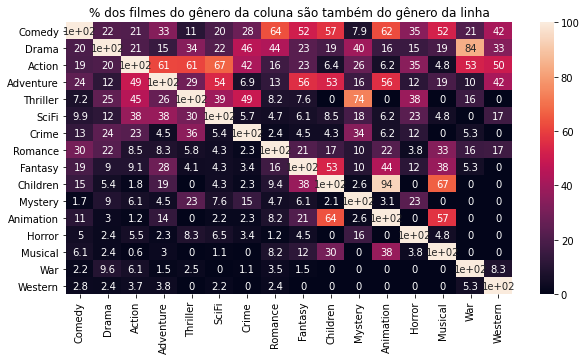

In [54]:
plt.figure(figsize=(10,5)) #
sns.heatmap(porcentagem_por_genero, annot=True,vmin=0,vmax=100)
plt.title('% dos filmes do gênero da coluna são também do gênero da linha')
plt.show()

#### Conclusão:
Com o heatmap tira-se diversar conclusões sobre os gênero como:
- Os filmes de comédia tem uma boa correlação com outros gêneros, observando a linha "Comedy" se vê que a maioria dos gêneros têm comédia em seus filmes(Com excessão dos filmes de thriller).
- Assim como os filmes de comédia, o drama se correlaciona com vários outros gêneros, tal que a maior correlação são para filmes de crime,thriller e comédia(cerca de 23%).
- Ação e Aventura: Ao contrário dos outros dois, a correlação entre ação e aventura é grande, 2 a cada 3 filmes de aventura são também de ação!O mesmo ocorre observando os filmes de thriller.
- Suspense e mistério: 74% dos filmes de mistério são também de suspense,mostrando que são gêneros com carecterísticas bem próximas.
- "Surpreendentemente" quase todos os filmes de animação(94%) são direcionados para crianças.

Outras pequenas conclusões podem ser tiradas, no entanto essas são as mais claras ao observar o heatmap.